In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
from scipy import stats
df =pd.read_csv('employees.csv')


In [2]:
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


In [3]:
df.shape

(1000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [6]:
df.describe()

,Salary,Bonus %
count,1000.000000,1000.000000
mean,90662.181000,10.207555
std,32923.693342,5.528481
min,35013.000000,1.015000
25%,62613.000000,5.401750
50%,90428.000000,9.838500
75%,118740.250000,14.838000
max,149908.000000,19.944000


In [9]:
a = df['Salary']
print(min(a))
print(max(a))
print(stat.mode(a))

35013
149908
147183


In [10]:
data = df[['Salary','Bonus %']]

In [11]:
data

,Salary,Bonus %
0,97308,6.945
1,61933,4.170
2,130590,11.858
3,138705,9.340
4,101004,1.389
...,...,...
995,132483,16.655
996,42392,19.675
997,96914,1.421
998,60500,11.985


In [12]:
corr=data.corr()

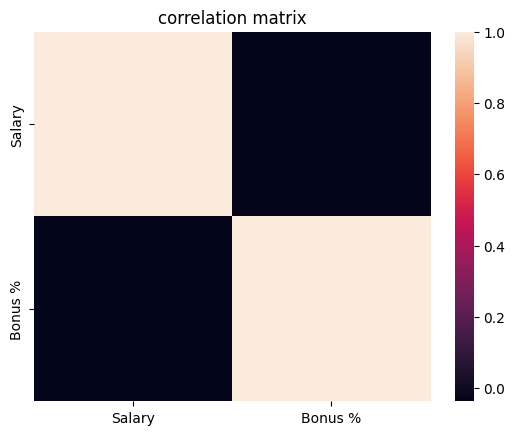

In [15]:
sns.heatmap(corr)
plt.title("correlation matrix")
plt.show()

In [17]:
skew = data.skew()


In [18]:
skew

Salary     0.047180
Bonus %    0.107464
dtype: float64

<Axes: ylabel='Frequency'>

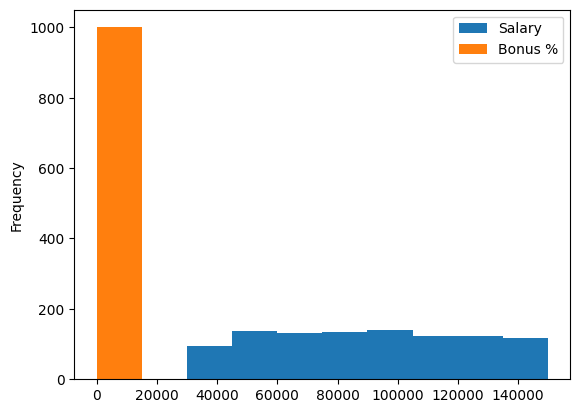

In [21]:
data.plot(kind='hist')


In [22]:
d1 = df[['First Name','Team']]

In [23]:
d1

,First Name,Team
0,Douglas,Marketing
1,Thomas,NaN
2,Maria,Finance
3,Jerry,Finance
4,Larry,Client Services
...,...,...
995,Henry,Distribution
996,Phillip,Finance
997,Russell,Product
998,Larry,Business Development


<Axes: xlabel='Team', ylabel='count'>

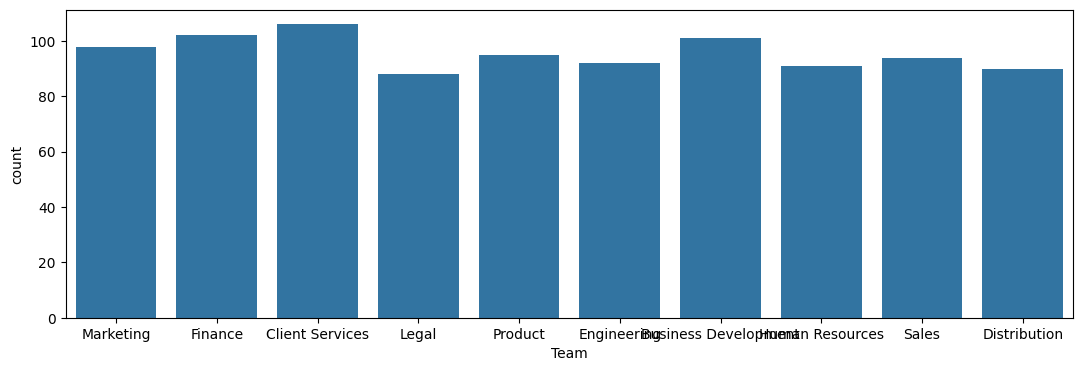

In [27]:
plt.figure(figsize=(13,4))
sns.countplot(d1, x='Team')

<Axes: xlabel='Gender', ylabel='Salary'>

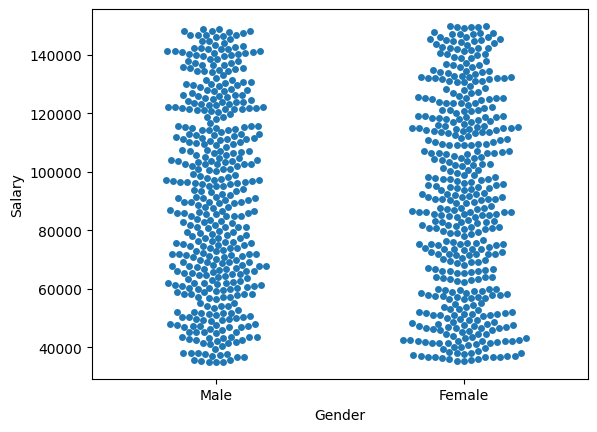

In [28]:
sns.swarmplot(data=df, x='Gender', y='Salary')


<Axes: xlabel='Team', ylabel='Bonus %'>

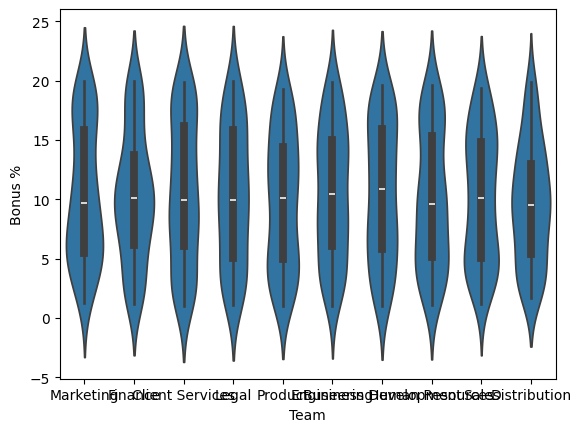

In [29]:
sns.violinplot(data=df, x='Team', y='Bonus %')


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,f1_score
df = pd.read_csv('loan.csv')

In [31]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [32]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [33]:
x =df[['ApplicantIncome']].values
y=df[['LoanAmount']].values

In [34]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=42)

In [36]:
model = LinearRegression()
model.fit(x_train,y_train)

ValueError: Input y contains NaN.